In [3]:
import matplotlib as plt #python library for visualization
import pandas as pd #python library for data analysis
import numpy as np #python library for dealing with arrays and matrices
import matplotlib.pyplot as plt #makeing matplotlib like a Matlab
import seaborn as sns #python library for visualization, but based on matplotlib
from sklearn.cluster import KMeans #sklearn: python machine learning library. cluster: a submodule of sklearn for clustering. KMeans: a clustering algorithm
from sklearn.cluster import DBSCAN #DBSCAN: another clustering algorithm
from sklearn.preprocessing import StandardScaler #StandardScaler: a tool helps to transform different units to the same "scale"
import sqlite3 #python module for SQLite

In [4]:
df = pd.read_csv('/Users/jiajiesu/Documents/my_github/RFM-model/rfm_data.csv', encoding = 'ISO-8859-1')

In [5]:
print(len(df)) #count how many rows in total

df.info() #basic overview of the dataset

541909
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<Axes: >

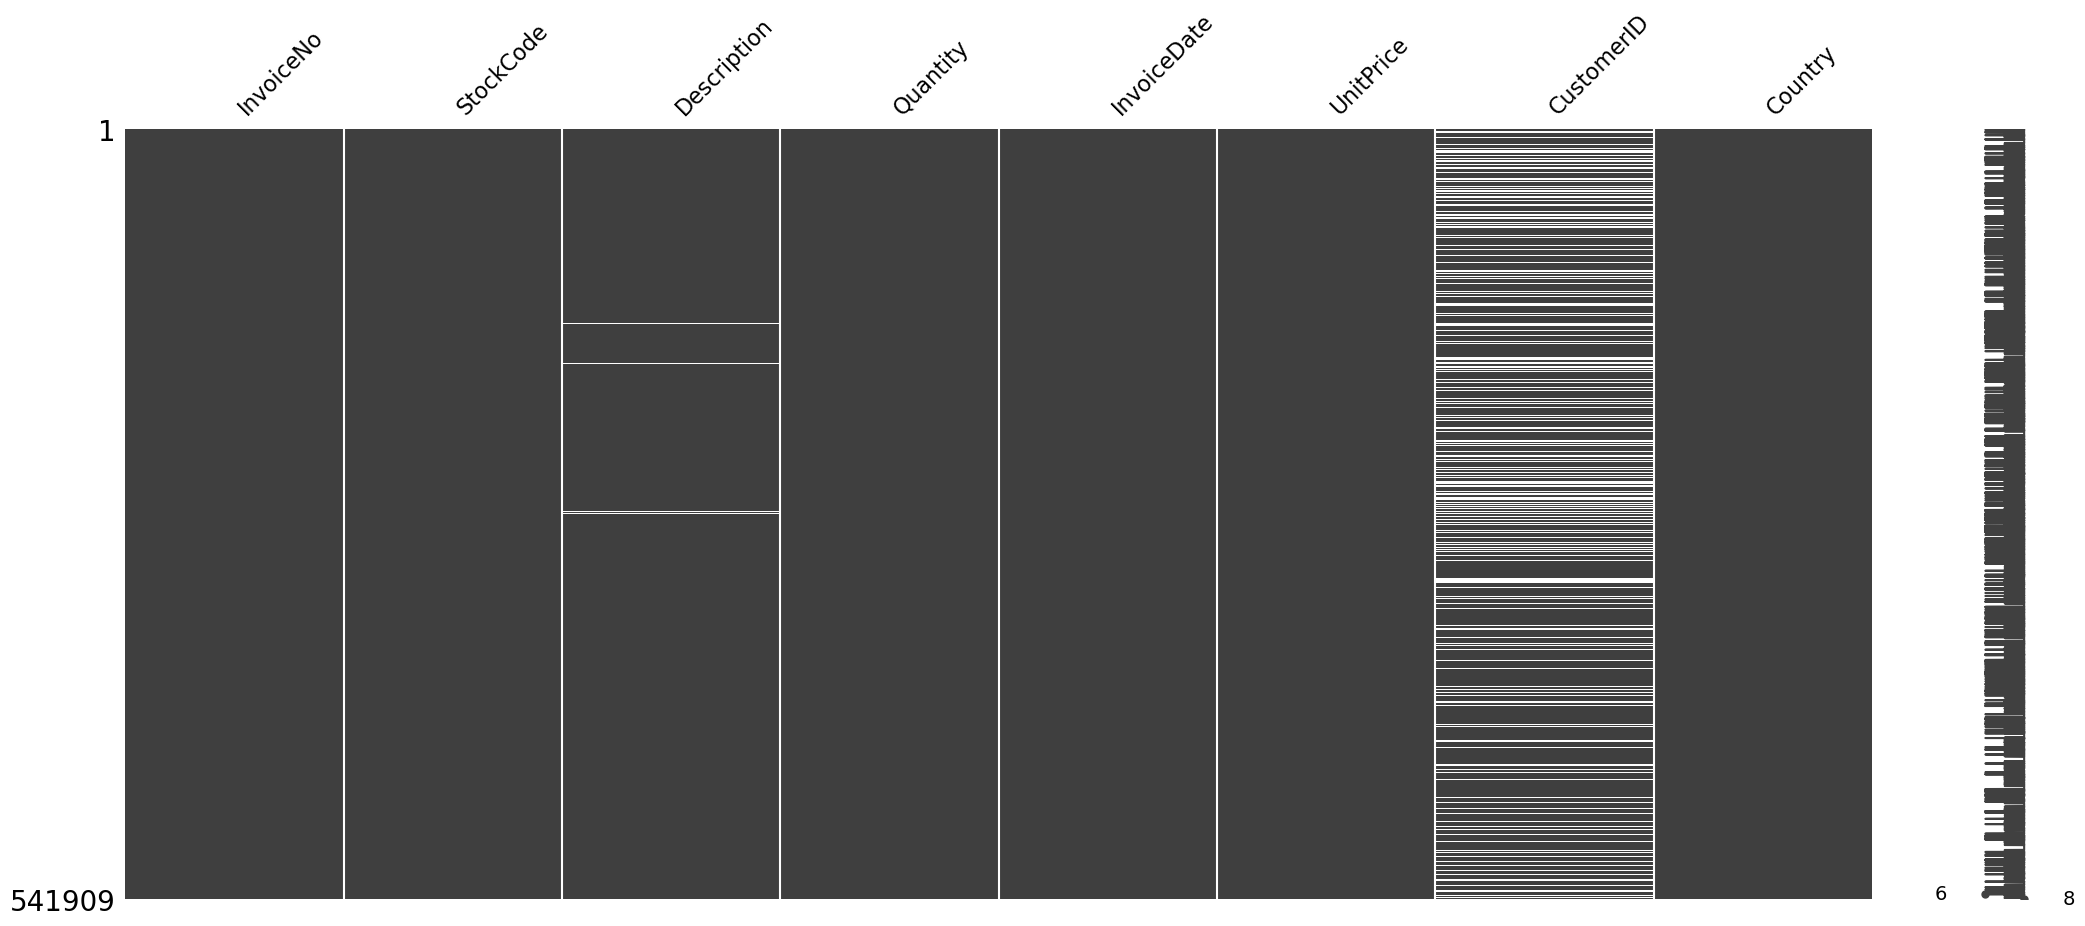

In [6]:
import missingno as msno
#missingno: a python library for visualizing missing data patterns in pandas dataframe
#matrix: generates a matrix where each row corresponds to a row and each column corresponds to a column

msno.matrix(df)

In [7]:
not_null_condition = df['CustomerID'].notna() #check if this column is null in each row
# print(not_null_condition)

df = df[not_null_condition] #filter out rows where customer ID is null

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
df.columns = df.columns.str.lower() #turn all column names into lower case
print(df.columns)

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')


In [9]:
print(len(df))
df.info()

distinct_invoice_num = df['invoiceno'].nunique()
print(distinct_invoice_num)

406829
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    406829 non-null  object 
 1   stockcode    406829 non-null  object 
 2   description  406829 non-null  object 
 3   quantity     406829 non-null  int64  
 4   invoicedate  406829 non-null  object 
 5   unitprice    406829 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
22190


In [10]:
print(df.head(50))

   invoiceno stockcode                          description  quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

In [11]:
quantity_condition = df['quantity'] > 0 #filter out row where quantity is less than 0. If quantity is less than 0, the transaction is a refund.

# quantity_condition.value_counts()
# print(df[quantity_condition].head(20))

df = df[quantity_condition]
print(len(df))

397924


In [12]:
invalid_unitprice = df['unitprice'] <= 0

# invalid_unitprice.value_counts()

df = df[~invalid_unitprice]

In [13]:
print(df['invoicedate'].head(10))

0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
5    12/1/2010 8:26
6    12/1/2010 8:26
7    12/1/2010 8:28
8    12/1/2010 8:28
9    12/1/2010 8:34
Name: invoicedate, dtype: object


In [14]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['customerid'] = df['customerid'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    397884 non-null  object        
 1   stockcode    397884 non-null  object        
 2   description  397884 non-null  object        
 3   quantity     397884 non-null  int64         
 4   invoicedate  397884 non-null  datetime64[ns]
 5   unitprice    397884 non-null  float64       
 6   customerid   397884 non-null  int64         
 7   country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [16]:
df['month'] = df['invoicedate'].dt.month
df['year'] = df['invoicedate'].dt.year
df['months'] = df['invoicedate'].dt.strftime('%Y-%m')
df['totalcost'] = df['quantity'] * df['unitprice']

print(df.head(10))

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          invoicedate  unitprice  customerid         country  month  year  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom     12  2010   
1 2010-12-01 08:26:00       3.39       17850  United 

In [17]:
frequency = df.groupby('customerid')['invoiceno'].nunique().reset_index()
frequency.columns = ['customerid', 'unique_invoice_count']
print(frequency.head(10))

   customerid  unique_invoice_count
0       12346                     1
1       12347                     7
2       12348                     4
3       12349                     1
4       12350                     1
5       12352                     8
6       12353                     1
7       12354                     1
8       12355                     1
9       12356                     3


In [18]:
monetary = df.groupby('customerid')['totalcost'].sum().reset_index()
monetary.columns = ['customerid', 'sum_total_cost']
print(monetary.head(10))

   customerid  sum_total_cost
0       12346        77183.60
1       12347         4310.00
2       12348         1797.24
3       12349         1757.55
4       12350          334.40
5       12352         2506.04
6       12353           89.00
7       12354         1079.40
8       12355          459.40
9       12356         2811.43


In [19]:
df['invoicedate'] = df['invoicedate'].dt.strftime('%Y-%m-%d')

In [20]:
df['invoicedate'] = df['invoicedate'].astype('datetime64[ns]')

In [21]:
rfm = df.pivot_table(
    index='customerid',
    values=["invoiceno", "totalcost", "invoicedate"],
    aggfunc={
        "invoicedate": "max", #for calculating recency
        "invoiceno": pd.Series.nunique, #frequency
        "totalcost": "sum" #monetary
    }
)

# print(rfm)

In [22]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   invoicedate  4338 non-null   datetime64[ns]
 1   invoiceno    4338 non-null   int64         
 2   totalcost    4338 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 135.6 KB


In [23]:
rfm['recency'] = rfm['invoicedate'].max() - rfm['invoicedate']

# rfm.head()

In [24]:
rfm.rename(columns={
        "recency": "Recency",
        "invoiceno": "Frequency",
        "totalcost": "Monetary"
    }, inplace = True)
rfm.head()

,invoicedate,Frequency,Monetary,Recency
customerid,,,,
12346,2011-01-18,1,77183.60,325 days
12347,2011-12-07,7,4310.00,2 days
12348,2011-09-25,4,1797.24,75 days
12349,2011-11-21,1,1757.55,18 days
12350,2011-02-02,1,334.40,310 days


In [25]:
rfm = rfm.drop(columns=['invoicedate'])

In [26]:
rfm[['Recency','Frequency','Monetary']].apply(lambda x: (x - x.mean())/x.std()) #Calculate the Z-scores of each metric

,Recency,Frequency,Monetary
customerid,,,
12346,2.329120,-0.425048,8.357705
12347,-0.900484,0.354376,0.250937
12348,-0.170574,-0.035336,-0.028593
12349,-0.740504,-0.425048,-0.033008
12350,2.179138,-0.425048,-0.191325
...,...,...,...
18280,1.849178,-0.425048,-0.208435
18281,0.879297,-0.425048,-0.219535
18282,-0.850490,-0.295144,-0.208718


In [27]:
def rfm_func(x):
  transformation = x.apply(lambda x: "1" if x>0 else "0")
  transformation = transformation.Recency + transformation.Frequency + transformation.Monetary

  classification = {
      "111": "Very Important Members",
      "011": "Maintained Customers",
      "101": "Attentive Members",
      "001": "Key Retention Customers",
      "110": "Potential Regular Customers",
      "010": "Sustained Customers",
      "100": "Standard Potential Customers",
      "000": "Dormant Members"
  }
  return classification[transformation]

'''
Explanation:

Very Important Members: These members are valuable assets to the brand, showing a strong preference for products.
Recommended Action: Focus on exclusive gifts and new product discounts to encourage continued engagement and positive interaction with the brand.

Maintained Customers: These are former VIPs and significant revenue contributors who have not purchased recently.
Recommended Action: Collect feedback and use nurturing scripts to understand and address why they have disengaged from the brand.

Attentive Members: Although these members purchase infrequently, their high spending amounts in single transactions can quickly elevate them to VIP status.
Recommended Action: Offer exclusive, sporadic discounts to remind them of the brand during the repeat purchase period.

Key Retention Customers: High-spending customers who purchase infrequently.
Recommended Action: Target them with new product promotions to strengthen brand awareness and confidence.

Potential Regular Customers: Despite their lower spending amounts per purchase, their high frequency indicates strong loyalty.
Recommended Action: Use tiered discounts or special bundles to increase their average order value.

Sustained Customers: Previous frequent buyers who have not returned for a while.
Recommended Action: Investigate any major changes in promotional activities that might have caused their disengagement and address these factors to encourage their return.

Standard Potential Customers: These customers may have been drawn in by major promotional events but spend less.
Recommended Action: Focus on re-engagement strategies during key promotions to encourage more frequent purchases.

Dormant Members: These members are the lowest priority and may lack trust in the brand.
Recommended Action: Offer discount codes and concern letters, but if there is no response after a period, consider removing them from the mailing list.
'''

'\nExplanation:\n\nVery Important Members: These members are valuable assets to the brand, showing a strong preference for products.\nRecommended Action: Focus on exclusive gifts and new product discounts to encourage continued engagement and positive interaction with the brand.\n\nMaintained Customers: These are former VIPs and significant revenue contributors who have not purchased recently.\nRecommended Action: Collect feedback and use nurturing scripts to understand and address why they have disengaged from the brand.\n\nAttentive Members: Although these members purchase infrequently, their high spending amounts in single transactions can quickly elevate them to VIP status.\nRecommended Action: Offer exclusive, sporadic discounts to remind them of the brand during the repeat purchase period.\n\nKey Retention Customers: High-spending customers who purchase infrequently.\nRecommended Action: Target them with new product promotions to strengthen brand awareness and confidence.\n\nPote

In [28]:
rfm['customer_segment'] = rfm[['Recency','Frequency','Monetary']].apply(lambda x: (x - x.mean())/x.std()).apply(rfm_func, axis=1)
rfm.head()

,Frequency,Monetary,Recency,customer_segment
customerid,,,,
12346,1,77183.60,325 days,Attentive Members
12347,7,4310.00,2 days,Maintained Customers
12348,4,1797.24,75 days,Dormant Members
12349,1,1757.55,18 days,Dormant Members
12350,1,334.40,310 days,Standard Potential Customers


No invalid labels


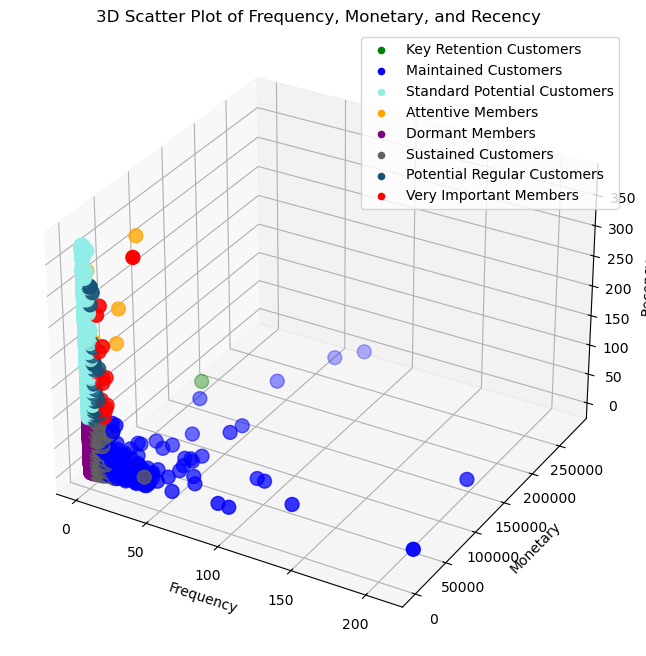

In [29]:
from mpl_toolkits.mplot3d import Axes3D
'''
mpl_toolkits is a collection of utility toolkits that extend the functionality of Matplotlib
mplot3d is a specific toolkit within mpl_toolkits that provides tools for creating 3D plots
Axes3D is a class within the mplot3d toolkit. You use it to create a 3D axes object to plot your 3D data.
'''

fig = plt.figure(figsize=(10, 8))
# This line creates a new, empty figure with 10 inches wide and 8 inches tall. It is like a canvas which doesn't contain any actual plots or data visualizations.
ax = fig.add_subplot(111, projection='3d')

df=rfm.copy()

# Convert 'Recency' from timedelta to days (numerical)
df['Recency'] = df['Recency'].dt.days

colors = {
    'Key Retention Customers': 'green',
    'Maintained Customers': 'blue',
    'Standard Potential Customers': '#91eee7',
    'Attentive Members': 'orange',
    'Dormant Members': 'purple',
    'Sustained Customers': '#616161',
    'Potential Regular Customers': '#165376',
    'Very Important Members': 'red'
    }

invalid_labels = set(df['customer_segment'].unique()) - set(colors.keys())

if invalid_labels:
    raise ValueError(f"The following labels do not have corresponding colors: {invalid_labels}")
else:
     print("No invalid labels")

scatter = ax.scatter(
    df['Frequency'],
    df['Monetary'],
    df['Recency'],
    c=df['customer_segment'].map(colors),
    s=100
)

ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

for label, color in colors.items():
    ax.scatter([], [], [], c=color, label=label)

ax.legend()

plt.title('3D Scatter Plot of Frequency, Monetary, and Recency')

plt.show()

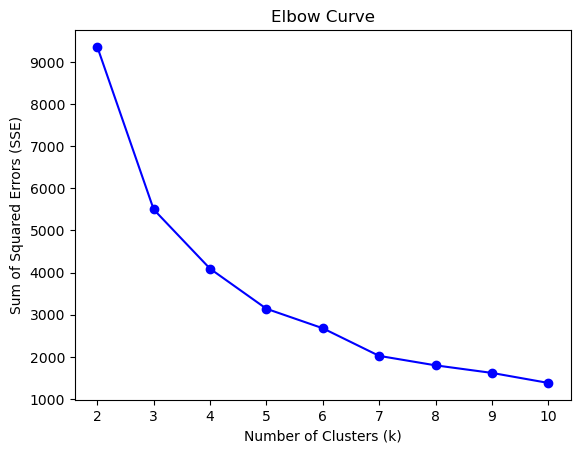

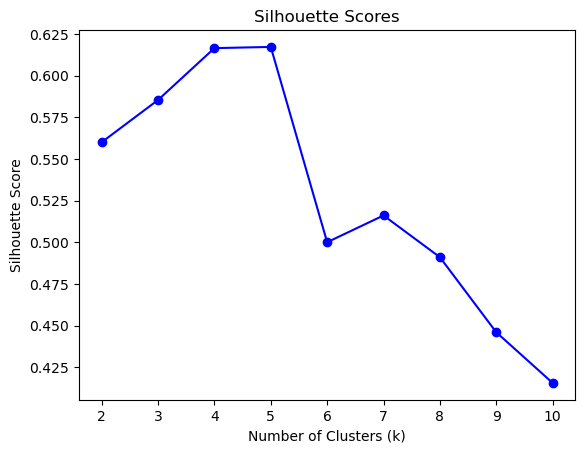

In [30]:
from sklearn.metrics import silhouette_score

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

rfm_segmentation['Recency'] = rfm_segmentation['Recency'].dt.days

# Determine the optimal value of k using the elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

X = rfm_segmentation.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

In [31]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

# Create a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['kmeans_cluster'] = kmeans.labels_

In [32]:
rfm_segmentation.head(60)

,Recency,Frequency,Monetary,kmeans_cluster
customerid,,,,
12346,325,1,77183.60,2
12347,2,7,4310.00,0
12348,75,4,1797.24,0
12349,18,1,1757.55,0
12350,310,1,334.40,0
12352,36,8,2506.04,0
12353,204,1,89.00,0
12354,232,1,1079.40,0
12355,214,1,459.40,0


In [36]:
X = rfm[['Recency','Frequency','Monetary']].copy()

# Convert Recency to numeric (days or seconds) if it's a timedelta
if np.issubdtype(X['Recency'].dtype, np.timedelta64):
    # Convert timedelta to days or seconds
    X['Recency'] = X['Recency'].dt.total_seconds()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X_scaled)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Print the number of clusters and noise points
print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 162


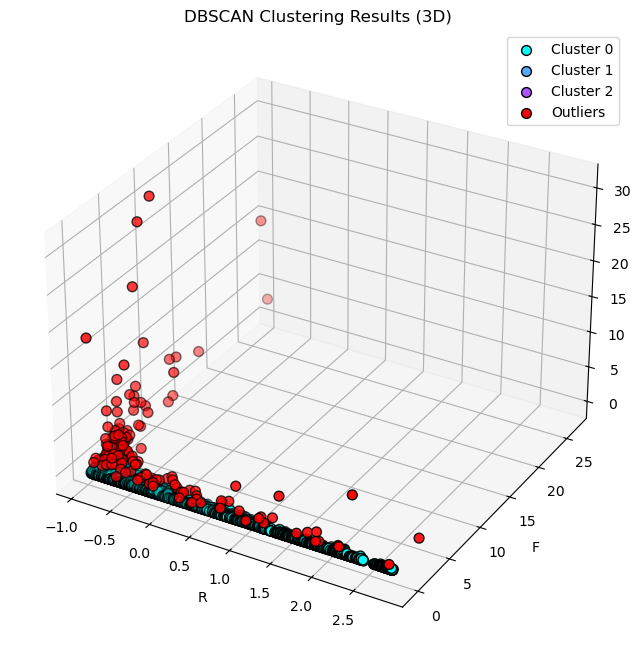

In [38]:
# Custom color map
custom_cmap = plt.colormaps.get_cmap('cool').resampled(len(set(clusters)))

# Visualize the clusters in 3D with custom colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters with legend
for cluster_label in set(clusters):
    if cluster_label == -1:
        # Plot outliers separately
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c='red',
            label='Outliers',
            marker='o',
            edgecolors='k',
            s=50
        )
    else:
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c=[custom_cmap(cluster_label)],
            label=f'Cluster {cluster_label}',
            marker='o',
            edgecolors='k',
            s=50
        )

ax.set_title('DBSCAN Clustering Results (3D)')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

# Add legend
ax.legend()

plt.show()

In [39]:
rfm_segmentation['DBSCAN_cluster'] = clusters
rfm_segmentation

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster
customerid,,,,,
12346,325,1,77183.60,2,-1
12347,2,7,4310.00,0,0
12348,75,4,1797.24,0,0
12349,18,1,1757.55,0,0
12350,310,1,334.40,0,0
...,...,...,...,...,...
18280,277,1,180.60,0,0
18281,180,1,80.82,0,0
18282,7,2,178.05,0,0
